In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../python/')

# California dataset

The [dataset](https://energy.duke.edu/content/distributed-solar-pv-array-location-and-extent-data-set-remote-sensing-object-identification) is divided in a training set, a validation set and testing set. To avoid bias, these sets are *always* the same.

In [2]:
import random
import via as VIA

from dataset import VIADataset

via = VIA.load('../products/json/california.json')

keys = sorted(list(via.keys()))

random.seed(0)
random.shuffle(keys)

train_via = {key: via[key] for key in keys[:350]}
valid_via = {key: via[key] for key in keys[350:400]}
test_via = {key: via[key] for key in keys[400:]}

trainset = VIADataset(train_via, '../resources/california/', shuffle=True)
validset = VIADataset(valid_via, '../resources/california/', shuffle=True)
testset = VIADataset(test_via, '../resources/california/', shuffle=True)

print('Training size = {}'.format(len(trainset)))
print('Validation size = {}'.format(len(validset)))
print('Testing size = {}'.format(len(testset)))

Training size = 14236
Validation size = 2078
Testing size = 3105


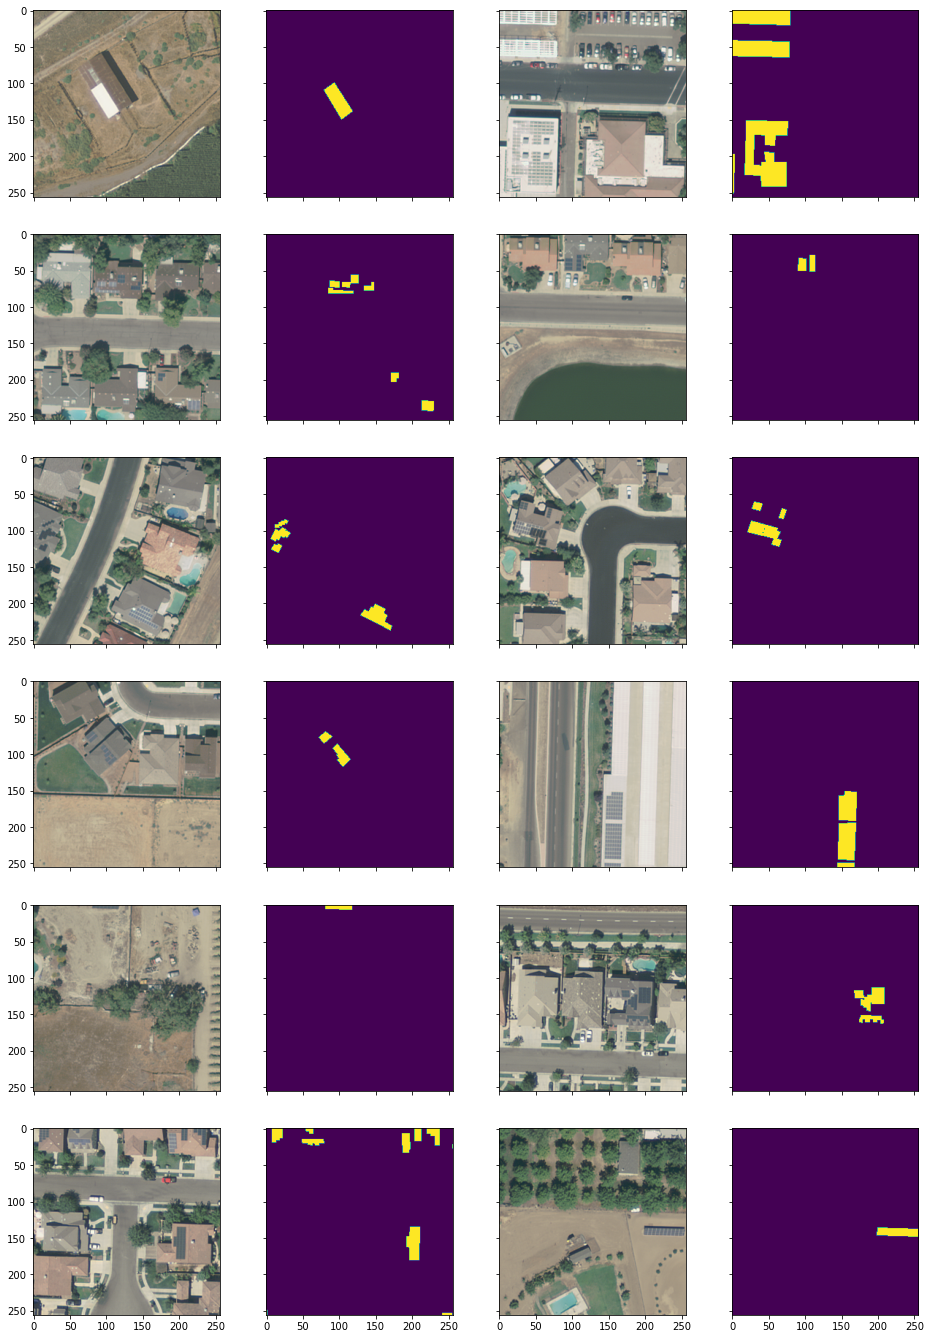

In [3]:
from plots import plot_images, flatten

images = []

for loader in [iter(trainset), iter(validset), iter(testset)]:
    for _ in range(4):
        images.append(next(loader))

plot_images(flatten(images), ncols=4)

## Data augmentation

Some extensive *data augmentation* was performed on this dataset, including 

* Rotations (90°, 180° or 270°)
* Flips (horizontal or vertical)
* Brightness alteration
* Saturation alteration
* Contrast alteration
* Blurring
* Smoothing
* Sharpening
* ...

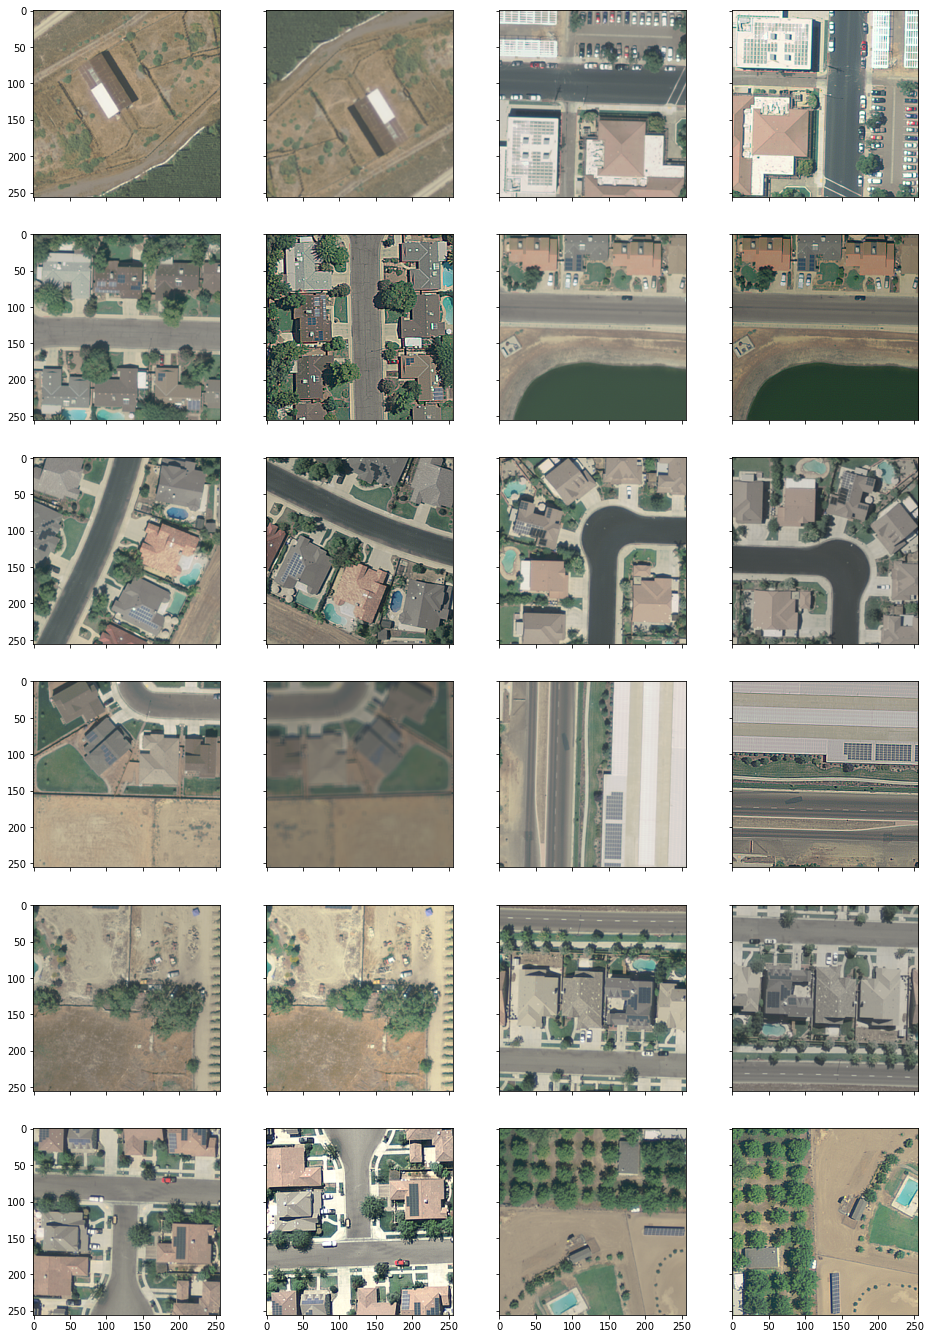

In [4]:
from dataset import ColorJitter, RandomFilter, RandomTranspose

augmented = RandomFilter(ColorJitter(RandomTranspose(images)))

plot_images(
    flatten([
        (images[i][0], x[0])
        for i, x in enumerate(augmented)
    ]),
    ncols=4
)